# Milestone2: Data gathering and preprocessing (deadline: 30.03 noon)

## 1. Narrowing down the research question
As discussed in the feedback session, your research question needs to be pinned down to one or several concrete and attainable goals. In the first section of the notebook please address the following points:

Name your concrete questions and explain them briefly.
: Rap -  important vocal artistry. Well-known rap genres : include pop, gangster, old school.. 
Even though all those rap subgenres share common grounds, (general characteristics on rap music), intergenre difference is also significant.
it reflect the assumed audience of the songs, the place it will be played (club? dance floor? or underground studio? or something else?) 


In some studies on rap, general idea of rhythmic onset/ history based approach/ has been analyzed. But still, the genre-specific characteristics are hightly deprecated, especially in musicology studies

In our project, different rap genres. (phrasing? phrase length. flow length (break with rest), distribution of syllabic onsets lengths)
we choose gangter and old school rap in anglophone data.


Analyse how these questions relate to your original idea, that is, in what way they narrow it down.

but there exists some culture-spefific or language-specific genres as well, such as 'trap' genre in french hiphop.




Describe the dataset you selected and the information represented in it.



### Dataset

We are using the dataset of MCFlow, which is publically available on website www.rapscience.net. 

M.C.Flow transcriptions are encoded as Humdrum-Syntax text files. Eight humdrum spines are used to encode information in each transcription. Each spine has it's own, original humdrum interpretation. The eight interpretations are:
- recipx : the rhythmic duration of syllables.
- stress : whether each syllable is stressed (1) or unstressed (0).
- tone : formation about pitch accents and other notable pitch contours in flow, including boundary tones.
- break : the boundaries between prosodic units.
- rhyme
- ipa : the pronunciation of each syllable using the International Phonetic Alphabet.
- lyrics : The lyrics of the rap in normal English spelling, as well as some basic information about syntactic boundaries in the flow.
- hype : additional hype vocals that happen in a rap song.

Considering the fact that not all of the interpretations are present in the MCFlow dataset, and also the complexity of encoding stress, tone, rhype, and ipa on our own, we are using only 'recipx','break', and 'lyrics'. Using the selected interpretations, we can define the 'rhythmic flow' in several ways:

- phrase-based: Flow breaks with a comma(,), period(.), or phrasal break in lyrics. This corresponds to the line break or semantic subphrase of lyrics.
- rest-based: Flow breaks with a rest. 


### Adding inter-cultural (or inter-lingual) element to our study







Discuss how the data enables you to answer your questions.






On the other hand, we will encode the French part into MusicXML files which is a standart XML file but modified to contain the musical information we need (see section 2 for further explanations). We selected the French songs based on the popularity of the songs in each genre/style. For now we have a list of 20 songs per genre but we will at first restrict to 10 songs per genre.

- Discuss how the data enables you to answer your questions:

With the help of all the features, we will be enable to determine the syllable rate, the rhyme density, the average rhyme chain, syncopation (if we implement the syllables stress), the proportion of the metric position of syllables and rhymed syllables and so on for each song, artist, genre or languages. These results will lead us to some differences between genre and languages.



Formulate educated guesses on your outcomes based on this data.
: songs from similar genres will show 'closer' distance and higher similarities towards songs from the same genre, compared to ones from another genre. Observe different distribution of the parameter we choose. 


Reason on how you can tell in the end whether these outcomes have manifested or not and how confident you will possibly be.


## 2. Gathering the data

### 2-1. Anglophone dataset
As mentioned above, the anglophone is already online in MCFlow website(http://www.rapscience.net/Data/downloads.html). 124 songs are collected in a single zip file. Once unzipped these files can be easily read in any text editing program, or even loaded into spreadsheet software. Since our goal is not restoring the origial songs, bur rather statistically analyzing them, we are not using a Humdrum Toolkit to interpret the encoded songs. Instead, we are using pandas library for analysis. 

Whereas there are 124 songs in the dataset, the final dataset size may differ according to the genre selection and classification results. For the moment, we have two genres(gangsta and old-school), 26 songs each, which makes our anglophone dataset contain 52 songs.

### 2-2. Francophone dataset



- Where do you get your data from:


For the French part: We will do our own data base.

- How do you get it:



For the French part: After the songs’s selection, we will encode them like this: First you download the mp3 version of the song (from youtube for example), then you add this song to a new track on a musical producing software (here it will be Logic pro). Then, you determine its tempo and you synchronize the beat on the song. After this, we add a new track and we tap the same note (A for example) on a pad (or keyboard) when we ear a syllable. We do this for the entire song and then we add the lyrics to each syllables on another note (G for example) and we do the same for the rhyme position and the breaks (and maybe the stress position of the syllables). Finally, we can export it as a MusicXML file and we will get the data with the help of a XML parser.


- What is the maximum available amount in theory (in the case of incomplete data aquisition):

20 songs per genre so 60 songs in total. 

- How much can you actually hope to lay hand on for milestone 3 on April 20th:

We did an encoding test of a song without encoding the (un)stressed syllables and it took us an entire day. But we think that we can do one song in one afternoon (it depends on the genre of the song) so we can maybe have 15 to 20 songs in total until April 20th but it is still not the right timing estimation…



## 3. Data format
This section is the main reason why this milestone is to be delivered in a Jupyter notebook: Give insightful examples for every question by loading and transforming data samples.

What format(s) does the raw data come in?
How is the information that the dataset represents encoded in this format?
Load your dataset and show examples of how you access the information that you are interested in.
Give an overview of your dataset by plotting some basic statistics of the relevant features and/or metadata.

### 3-1. Anglophone data
For the Anglophone dataset, the data are encoded in "kern format" and where each column correspond to as specific feature mentioned in previous section. (For example, column number one correspond to the rhythmic position and duration of the syllables, the second is the metrical position of the stressed/unstressed syllables) We have one file for each song and each verse is separated in the file. The data format is .rap, which is basically a text format that can be imported directly into pandas table.



In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# load sample data
sample_path = 'data/sample/50Cent_CandyShop.rap'
sample = pd.read_table(sample_path)

In [28]:
sample.head(10)

,**recip,**stress,**tone,**break,**rhyme,**ipa,**lyrics,**hype
0,*M4/4,*M4/4,*M4/4,*M4/4,*M4/4,*M4/4,*M4/4,*M4/4
1,*MM98,*MM98,*MM98,*MM98,*MM98,*MM98,*MM98,*MM98
2,*>Verse1,*>Verse1,*>Verse1,*>Verse1,*>Verse1,*>Verse1,*>Verse1,*>Verse1
3,!MC:50 Cent,!MC:50 Cent,!,!MC:50 Cent,!MC:50 Cent,!MC:50 Cent,!MC:50 Cent,!MC:50 Cent
4,=0,=0,=0,=0,=0,=0,=0,=0
5,2,.,.,.,.,R,.,.
6,8,.,.,.,.,R,.,.
7,16,1,.,4,.,ju,You,.
8,16,0,.,.,.,kʊd,could,.
9,16,1,.,.,.,hæv,have,.


In [29]:
# check the rows with na 

sample[sample.isnull().any(axis=1)]
# na rows are metadata rows. We are safe to proceed.

,**recip,**stress,**tone,**break,**rhyme,**ipa,**lyrics,**hype
457,!!!OTL:Candy Shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,!!!RTL:the Massacre,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,!!!RRD:2005/01/15|2005/02/08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,"!!!RRM:Shady, Aftermath",NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,!!!RC#:004092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,!!!BPP:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,!!!BPD:2005/03/05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,!!!COC:50 Cent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,!!!COL:50 Cent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,!!!COM:Curtis James Jackson III,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# count the measure indicators and verse indicators
measures = sample['**recip'][sample['**recip'].apply(lambda x: '=' in x)]
verses = sample['**recip'][sample['**recip'].apply(lambda x: 'Verse' in x)]

print('# of measures: ', measures.shape[0])
print('# of verses: ', verses.shape[0])

# of measures:  33
# of verses:  2


In [50]:
# save only the rows that contains syllabic onset
sample_clean = sample[sample['**recip'].apply(lambda x: x[0] in '0123456789')]
sample_clean.head()

In [59]:
# humdrum analysis: rest-based

# get the rest points, so that we can split flow according to rests.
sample_clean[sample_clean['**ipa']=='R'].head(5)

,**recip,**stress,**tone,**break,**rhyme,**ipa,**lyrics,**hype
5,2,.,.,.,.,R,.,.
6,8,.,.,.,.,R,.,.
14,4.,.,.,.,.,R,.,.
20,16,.,.,.,.,R,.,.
43,16,.,.,.,.,R,.,.


In [60]:
breaks_idx = sample_clean[sample_clean['**ipa']=='R'].index
# add closing break point


# create a new dataframe that will show the flowwise analysis on this song
sample_flowwise = pd.DataFrame(columns=['recip','lyric'])


for i in range(breaks_idx.shape[0]-1):
    (start, end) = (breaks_idx[i], breaks_idx[i+1])
    snippet = sample_clean.iloc[start:end]
    sample_flowwise.at[i,'recip'] = snippet['**recip'].values
    sample_flowwise.at[i,'lyric'] = ' '.join(snippet['**lyrics'].values)
    
sample_flowwise.head(10)

,recip,lyric
0,[16],it
1,"[8, 8, 4., 16, 16, 16, 16, 16]",your way . How do you want it
2,"[16, 16, 16, 12, 12, 12]",. you gon' back that thing
3,"[16, 16, 16, 16, 16, 8, 16, 16, 16, 16, 16, 8,...",up or should I push up on it tem- -per- -ature...
4,"[8, 8, 8, 8, 16, 16, 16, 8, 32, 32, 16, 16, 16...",dance floor jam packed hot as a tea ke- -ttle ...
5,"[16, 16, 8, 16, 16, 16, 8, 16, 16, 8, 16, 16, ...",-by it's sim- -ple . if you be a nym- -pho . I be
6,"[16, 8, 8, 16, 16, 16, 8, 16]",a nym- -pho . in the ho- -tel
7,"[16, 16, 16, 16, 16, 16]",or in the back of the
8,"[8, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16...",ren- -tal on the beach or in the park . it's w...
9,"[16, 16, 16, 8., 8, 16, 16, 32, 32, 8, 16, 16,...",. I'm the love doc- -tor . have your friends t...


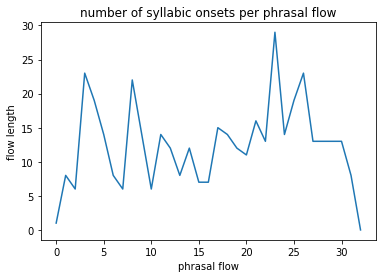

In [61]:
# plot the syllabic length of each phrasal flow

plt.plot(sample_flowwise.recip.apply(len))
plt.xlabel('phrasal flow')
plt.ylabel('flow length')
plt.title('number of syllabic onsets per phrasal flow')
plt.show()

In [51]:
# humdrum analysis: phrase-based

print('number of level 2 break : {0}'.format(sample_clean[sample_clean['**break']=='2'].shape))
print('number of level 3 break : {0}'.format(sample_clean[sample_clean['**break']=='3'].shape))
print('number of level 4 break : {0}'.format(sample_clean[sample_clean['**break']=='4'].shape))
print('number of rhythmic onset : {0}'.format(sample_clean.shape))

number of level 2 break : (4, 8)
number of level 3 break : (34, 8)
number of level 4 break : (5, 8)
number of rhythmic onset : (418, 8)


In [53]:
# according to the description on the website and our common knowledge of interpreting the lyrics,
# we concluded that only level 3,4 break are meaningful.

breaks_idx = sample_clean[sample_clean['**break'].apply(lambda x: x in ['3','4'])].index
# add closing break point


# create a new dataframe that will show the flowwise analysis on this song
sample_flowwise = pd.DataFrame(columns=['recip','lyric'])


for i in range(breaks_idx.shape[0]-1):
    (start, end) = (breaks_idx[i], breaks_idx[i+1])
    snippet = sample_clean.iloc[start:end]
    sample_flowwise.at[i,'recip'] = snippet['**recip'].values
    sample_flowwise.at[i,'lyric'] = ' '.join(snippet['**lyrics'].values)
    
sample_flowwise.head(10)

,recip,lyric
0,"[8, 4., 16, 16, 16, 16, 16, 16]",way . How do you want it .
1,"[16, 16, 12, 12, 12, 16]",you gon' back that thing up
2,"[16, 16, 16, 16, 8, 16, 16, 16, 16, 16, 8, 16,...",or should I push up on it tem- -per- -ature ri...
3,"[16, 16, 16, 16, 16, 8]",. let's go to the next
4,"[16, 8, 8, 8, 8, 8, 16, 16, 16, 8, 32]",le- -vel dance floor jam packed hot as a tea ke-
5,"[32, 16, 16, 16, 16, 8, 16, 16, 8, 16, 16]",-ttle . I break it down for you now ba- -by
6,"[16, 8, 16, 16, 16, 8, 16, 16, 8, 16, 16, 16, ...",it's sim- -ple . if you be a nym- -pho . I be a
7,"[8, 8, 16, 16, 16, 8, 16, 16, 16, 16, 16, 16, ...",nym- -pho . in the ho- -tel or in the back of ...
8,"[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]",on the beach or in the park . it's what- -e- -ver
9,"[16, 8, 16, 16, 16, 8, 8, 16, 16, 16, 16, 8., ...",you in- -to got the ma- -gic stick . I'm the l...


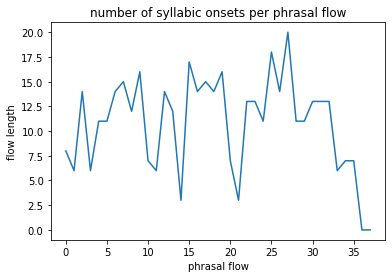

In [48]:
# plot the syllabic length of each phrasal flow

plt.plot(sample_flowwise.recip.apply(len))
plt.xlabel('phrasal flow')
plt.ylabel('flow length')
plt.title('number of syllabic onsets per phrasal flow')
plt.show()

In [42]:
#average number of syllabic onset per phrasal flow
print('syllabic onset per phrasal flow - mean: {0}, std: {1}'.format(sample_flowwise.recip.apply(len).mean(),\
                                                                     sample_flowwise.recip.apply(len).std()))

syllabic onset per phrasal flow - mean: 10.81578947368421, std: 4.837104691064547


In [49]:
# this can be done meter-based, rest-based.
# things we might explore:
# how many syllables / rhythmical onsets per 'flow'? 
# how many recips?

### 3-2. Francophone data

- What format(s) does the raw data come in / How is the information that the dataset represents encoded in this format:



For the French part, we will have a MusicXML file for each song. We will need to implement an XML parser to get the data. Here you can see the result of the encoding for one song: a part of the resulting partition and a part of the corresponding MusicXML file:

![image](https://user-images.githubusercontent.com/42543702/77852917-799af480-71e1-11ea-881b-78e312370731.png)


![image](https://user-images.githubusercontent.com/42543702/77852998-d7c7d780-71e1-11ea-8789-d1c2987c6398.png)


- How is the information that the dataset represents encoded in this format?
- Load your dataset and show examples of how you access the information that you are interested in. 
- Give an overview of your dataset by plotting some basic statistics of the relevant features and/or metadata. 